In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
from sklearn.cross_validation import train_test_split
import xgboost as xgb
from sklearn.metrics import roc_auc_score
import utils

/home/libfun/vrt/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
train = pd.read_csv('data_train.csv', index_col='Unnamed: 0')

In [3]:
test = pd.read_csv('data_eval.csv', index_col='Unnamed: 0')

Ghost = 169626  
Electron = 5610  
Muon = 29839  
Pion = 774220  
Kaon = 138261  
Proton = 81951

In [4]:
old_features = {'Electron': ['TrackP', 'TrackPt', 'TrackChi2PerDof', 'TrackNumDof',
                             'TrackGhostProbability', 'TrackFitMatchChi2', 'TrackFitVeloChi2',
                             'TrackFitVeloNDoF', 'TrackFitTChi2', 'TrackFitTNDoF',
                             'RichUsedR1Gas', 'RichUsedR2Gas', 'RichAboveMuThres',
                             'RichAboveKaThres', 'RichDLLe', 'RichDLLmu', 'RichDLLk',
                             'RichDLLp', 'RichDLLbt', 'MuonBkgLL', 'MuonMuLL', 'MuonIsMuon',
                             'MuonNShared', 'InAccMuon', 'MuonIsLooseMuon', 'EcalPIDe',
                             'EcalPIDmu', 'HcalPIDe', 'HcalPIDmu', 'PrsPIDe', 'InAccBrem', 'BremPIDe'],
                'Ghost': ['TrackP', 'TrackPt', 'TrackChi2PerDof', 'TrackNumDof',
                          'TrackGhostProbability', 'TrackFitMatchChi2', 'TrackFitVeloChi2',
                          'TrackFitVeloNDoF', 'TrackFitTChi2', 'TrackFitTNDoF',
                          'RichUsedR1Gas', 'RichUsedR2Gas', 'RichAboveMuThres',
                          'RichAboveKaThres', 'RichDLLe', 'RichDLLmu', 'RichDLLk',
                          'RichDLLp', 'RichDLLbt', 'MuonBkgLL', 'MuonMuLL', 'MuonIsMuon',
                          'MuonNShared', 'InAccMuon', 'MuonIsLooseMuon', 'EcalPIDe', 
                          'EcalPIDmu', 'HcalPIDe', 'HcalPIDmu', 'PrsPIDe', 'InAccBrem', 'BremPIDe'],
                'Kaon': ['TrackP', 'TrackPt', 'TrackChi2PerDof', 'TrackNumDof',
                         'TrackGhostProbability', 'TrackFitMatchChi2', 'TrackFitVeloChi2',
                         'TrackFitVeloNDoF', 'TrackFitTChi2', 'TrackFitTNDoF',
                         'RichUsedR1Gas', 'RichUsedR2Gas', 'RichAbovePiThres',
                         'RichAboveKaThres', 'RichAbovePrThres', 'RichDLLe', 'RichDLLmu',
                         'RichDLLk', 'RichDLLp', 'RichDLLbt', 'MuonBkgLL', 'MuonMuLL',
                         'MuonIsMuon', 'MuonNShared', 'InAccMuon', 'MuonIsLooseMuon',
                         'EcalPIDe', 'EcalPIDmu', 'HcalPIDe', 'HcalPIDmu', 'PrsPIDe',
                         'InAccBrem', 'BremPIDe'],
                'Muon': ['TrackP', 'TrackPt', 'TrackChi2PerDof', 'TrackNumDof',
                         'TrackGhostProbability', 'TrackFitMatchChi2', 'TrackFitVeloChi2',
                         'TrackFitVeloNDoF', 'TrackFitTChi2', 'TrackFitTNDoF',
                         'RichUsedR1Gas', 'RichUsedR2Gas', 'RichAboveMuThres',
                         'RichAboveKaThres', 'RichDLLe', 'RichDLLmu', 'RichDLLk',
                         'RichDLLp', 'RichDLLbt', 'MuonBkgLL', 'MuonMuLL', 'MuonNShared',
                         'InAccEcal', 'EcalPIDe', 'EcalPIDmu', 'InAccHcal', 'HcalPIDe',
                         'HcalPIDmu', 'InAccPrs', 'PrsPIDe', 'InAccBrem', 'BremPIDe'],
                'Pion': ['TrackP', 'TrackPt', 'TrackChi2PerDof', 'TrackNumDof',
                         'TrackGhostProbability', 'TrackFitMatchChi2', 'TrackFitVeloChi2',
                         'TrackFitVeloNDoF', 'TrackFitTChi2', 'TrackFitTNDoF',
                         'RichUsedR1Gas', 'RichUsedR2Gas', 'RichAbovePiThres',
                         'RichAboveKaThres', 'RichDLLe', 'RichDLLmu', 'RichDLLk',
                         'RichDLLp', 'RichDLLbt', 'MuonBkgLL', 'MuonMuLL',
                         'MuonIsMuon', 'MuonNShared', 'InAccMuon', 'MuonIsLooseMuon',
                         'EcalPIDe', 'EcalPIDmu', 'HcalPIDe', 'HcalPIDmu', 'PrsPIDe',
                         'InAccBrem', 'BremPIDe'],
                'Proton': ['TrackP', 'TrackPt', 'TrackChi2PerDof', 'TrackNumDof',
                           'TrackGhostProbability', 'TrackFitMatchChi2', 'TrackFitVeloChi2',
                           'TrackFitVeloNDoF', 'TrackFitTChi2', 'TrackFitTNDoF',
                           'RichUsedR1Gas', 'RichUsedR2Gas', 'RichAbovePiThres',
                           'RichAboveKaThres', 'RichAbovePrThres', 'RichDLLe', 'RichDLLmu',
                           'RichDLLk', 'RichDLLp', 'RichDLLbt', 'MuonBkgLL', 'MuonMuLL',
                           'MuonIsMuon', 'MuonNShared', 'InAccMuon', 'MuonIsLooseMuon',
                           'EcalPIDe', 'EcalPIDmu', 'HcalPIDe', 'HcalPIDmu', 'CaloPrsE',
                           'PrsPIDe', 'InAccBrem', 'BremPIDe']}

In [5]:
pid_dict = {"Ghost": 0,
            "Electron": 11,
            "Muon": 13,
            "Pion": 211,
            "Kaon": 321,
            "Proton": 2212
}

In [6]:
target = np.abs(train.MCParticleType.values)
mask = np.array([i not in [0, 11, 13, 211, 321, 2212] for i in np.abs(train.MCParticleType.values)])
target[mask] = np.zeros(mask.sum())

y_test = np.abs(test.MCParticleType.values)
mask = np.array([i not in [0, 11, 13, 211, 321, 2212] for i in np.abs(test.MCParticleType.values)])
y_test[mask] = np.zeros(mask.sum())

In [7]:
target = np.abs(train.MCParticleType.values)

target_m = np.zeros(target.shape)
target_m[target == pid_dict['Ghost']] = 0*np.ones((target == pid_dict['Ghost']).sum())
target_m[target == pid_dict['Muon']] = 1*np.ones((target == pid_dict['Muon']).sum())
target_m[target == pid_dict['Pion']] = 2*np.ones((target == pid_dict['Pion']).sum())
target_m[target == pid_dict['Kaon']] = 3*np.ones((target == pid_dict['Kaon']).sum())
target_m[target == pid_dict['Proton']] = 4*np.ones((target == pid_dict['Proton']).sum())
target_m[target == pid_dict['Electron']] = 5*np.ones((target == pid_dict['Electron']).sum())

y_train = target_m.copy()

y_test = np.abs(test.MCParticleType.values)

target_m = np.zeros(y_test.shape)
target_m[y_test == pid_dict['Ghost']] = 0*np.ones((y_test == pid_dict['Ghost']).sum())
target_m[y_test == pid_dict['Muon']] = 1*np.ones((y_test == pid_dict['Muon']).sum())
target_m[y_test == pid_dict['Pion']] = 2*np.ones((y_test == pid_dict['Pion']).sum())
target_m[y_test == pid_dict['Kaon']] = 3*np.ones((y_test == pid_dict['Kaon']).sum())
target_m[y_test == pid_dict['Proton']] = 4*np.ones((y_test == pid_dict['Proton']).sum())
target_m[y_test == pid_dict['Electron']] = 5*np.ones((y_test == pid_dict['Electron']).sum())

y_test = target_m.copy()

In [8]:
X_train, X_val, y_trai, y_val = train_test_split(train, y_train, test_size=.1, 
                                                 random_state=42, stratify=y_train)

In [9]:
feat_uni = set(old_features['Electron'])
for v in old_features.values():
    k = set(v)
    feat_uni = feat_uni.union(k)
    
feat_uni = list(feat_uni)

In [25]:
import lasagne
from lasagne.layers import InputLayer, DenseLayer, DropoutLayer
from lasagne.utils import floatX
import theano

In [11]:
import theano.tensor as T

In [12]:
from sklearn.preprocessing import StandardScaler

In [13]:
def iterate_minibatches(inputs, targets, batchsize, shuffle=False):
    assert len(inputs) == len(targets)
    if shuffle:
        indices = np.arange(len(inputs))
        np.random.shuffle(indices)
    for start_idx in range(0, len(inputs) - batchsize + 1, batchsize):
        if shuffle:
            excerpt = indices[start_idx:start_idx + batchsize]
        else:
            excerpt = slice(start_idx, start_idx + batchsize)
        yield inputs[excerpt], targets[excerpt]

In [14]:
import time

In [15]:
from sklearn.metrics import log_loss
import sys

In [21]:
X_train_norm = train[feat_uni].applymap(lambda x: 0 if x == -999 else x)
X_test_norm = test[feat_uni].applymap(lambda x: 0 if x == -999 else x)

sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train_norm.values)
X_test_sc = sc.transform(X_test_norm)

ndict = {'Ghost': 0, 'Muon': 1, 'Pion': 2, 'Kaon': 3, 'Proton': 4, 'Electron': 5}

train_w = np.ones(y_train.shape[0])
for p in ndict.keys():
    pw = y_train.shape[0]/(y_train == ndict[p]).sum()
    train_w[y_train == ndict[p]] *= pw
    
test_w = np.ones(y_test.shape[0])
for p in ndict.keys():
    pw = y_test.shape[0]/(y_test == ndict[p]).sum()
    test_w[y_test == ndict[p]] *= pw

In [30]:
input_var = T.tensor3('inputs')
target_var = T.ivector('targets')
weight_var = T.vector('weights')

net = {}
net['input'] = InputLayer((None, 38, 1),input_var=input_var)
net['fc1'] = DenseLayer(net['input'], num_units=128,
                        nonlinearity = lasagne.nonlinearities.rectify,
                        W = lasagne.init.GlorotUniform(gain = 'relu'))
net['drop1'] = DropoutLayer(net['fc1'], p=0.5)
net['fc2'] = DenseLayer(net['drop1'], num_units=128,
                        nonlinearity = lasagne.nonlinearities.rectify,
                        W = lasagne.init.GlorotUniform(gain = 'relu'))
net['drop2'] = DropoutLayer(net['fc2'], p=0.5)
net['fc3'] = DenseLayer(net['drop2'], num_units=6, nonlinearity=lasagne.nonlinearities.softmax)
output_layer = net['fc3']



prediction = lasagne.layers.get_output(output_layer)
loss = lasagne.objectives.categorical_crossentropy(prediction, target_var)
loss = loss.dot(weight_var) / weight_var.sum()

params = lasagne.layers.get_all_params(output_layer, trainable=True)
updates = lasagne.updates.adam(loss, params)

test_prediction = lasagne.layers.get_output(output_layer, deterministic=True)
test_loss = lasagne.objectives.categorical_crossentropy(test_prediction,
                                                        target_var)
test_loss = test_loss.dot(weight_var)  / weight_var.sum()
test_acc = T.mean(T.eq(T.argmax(test_prediction, axis=1), target_var),
                  dtype=theano.config.floatX)

train_fn = theano.function([input_var, weight_var, target_var], loss, updates=updates)

val_fn = theano.function([input_var, weight_var, target_var], [test_loss, test_acc])

test_fn = theano.function([input_var], test_prediction)

In [31]:
X_train_sc.shape

(1200000, 38)

In [32]:
# Finally, launch the training loop.
print("Starting training...")
# We iterate over epochs:
for epoch in range(1000):
    # In each epoch, we do a full pass over the training data:
    train_err = 0
    train_batches = 0
    start_time = time.time()
    #for batch in iterate_minibatches(X_train_sc.astype('float32').reshape(-1, 38, 1), 
    #                                 y_train, 1200000, shuffle=True):
    #    inputs, targets = batch
    train_err += train_fn(X_train_sc.astype('float32').reshape(-1, 38, 1), 
                          train_w.astype('float32'), y_train.astype('int32'))
    train_batches += 1

    # Then we print the results for this epoch:
    sys.stdout.write("\rEpoch {} of {} took {:.3f}s \t train loss: {:.6f}".format(
        epoch + 1, 1000, time.time() - start_time, train_err / train_batches))

Starting training...
Epoch 1000 of 1000 took 0.699s 	 train loss: 0.672811

In [33]:
preds = test_fn(X_test_sc.astype('float32').reshape(-1, 38, 1))

In [34]:
preds.shape

(1000000, 6)

In [35]:
label_list = ['Ghost', 'Muon', 'Pion', 'Kaon', 'Proton', 'Electron']

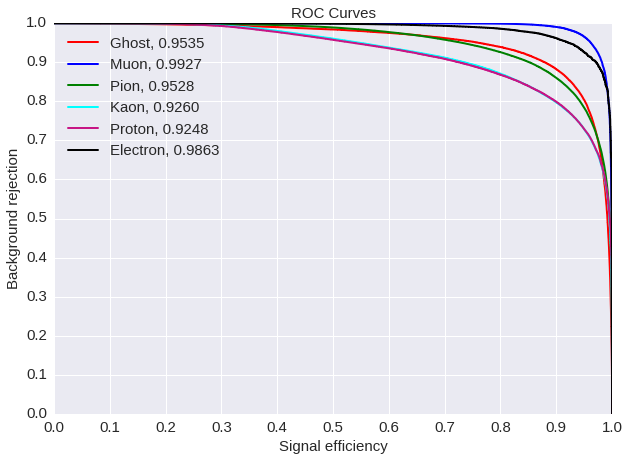

In [36]:
utils.get_roc_curves(y_test, preds, label_list)

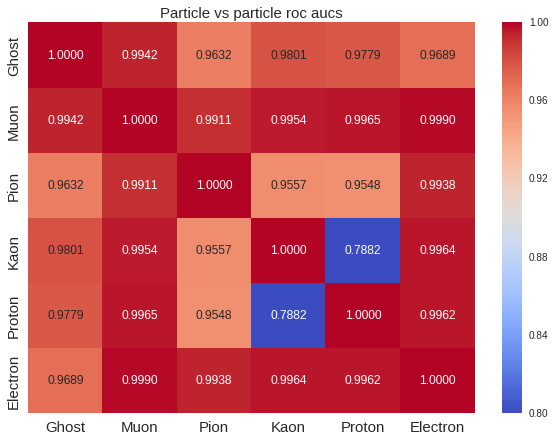

In [37]:
mat = utils.get_roc_auc_matrix(y_test, preds, label_list)

In [38]:
mat2 = pd.read_csv('./PID/python/class_vs_class_roc_auc_matrix_baseline.csv', index_col='Unnamed: 0')

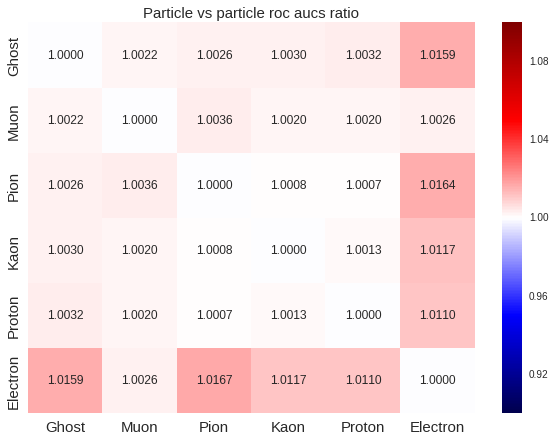

,Ghost,Muon,Pion,Kaon,Proton,Electron
Ghost,1.000000,1.002175,1.002629,1.002968,1.003249,1.015869
Muon,1.002175,1.000000,1.003608,1.002021,1.002037,1.002634
Pion,1.002629,1.003583,1.000000,1.000773,1.000670,1.016396
Kaon,1.002968,1.002018,1.000773,1.000000,1.001284,1.011721
Proton,1.003249,1.002037,1.000669,1.001284,1.000000,1.011021
Electron,1.015870,1.002638,1.016735,1.011688,1.011025,1.000000


In [39]:
utils.get_roc_auc_ratio_matrix(mat, mat2)

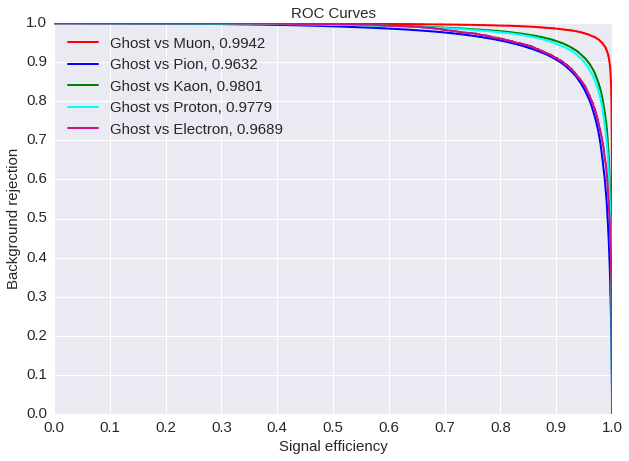

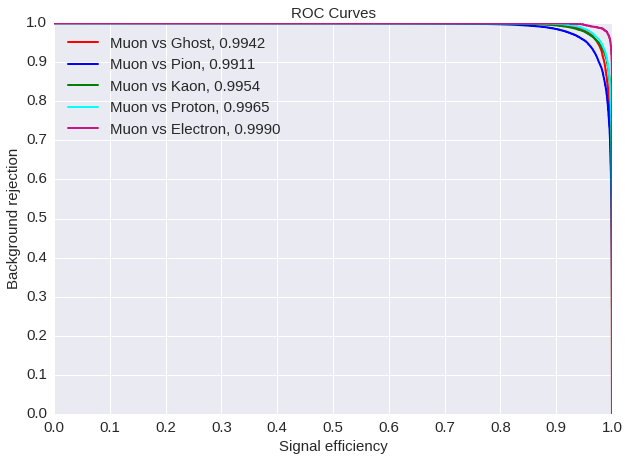

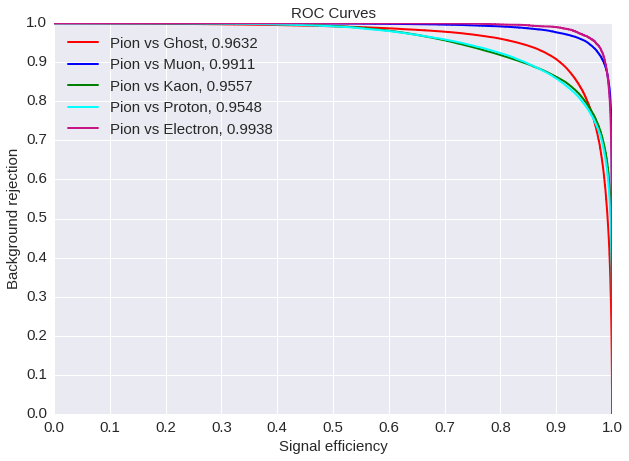

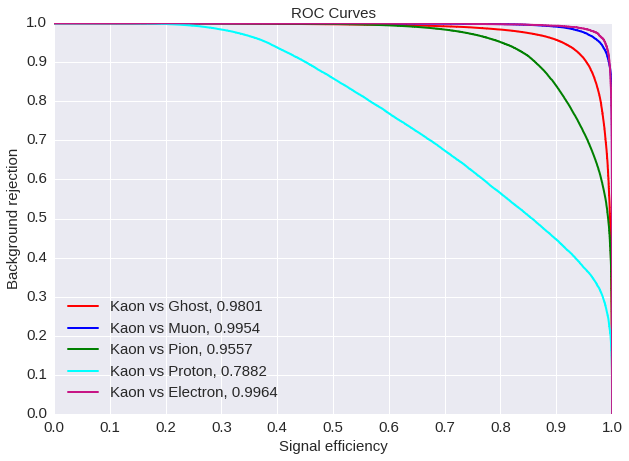

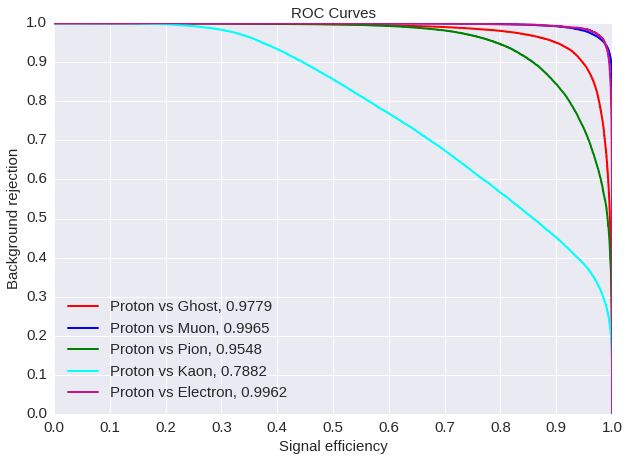

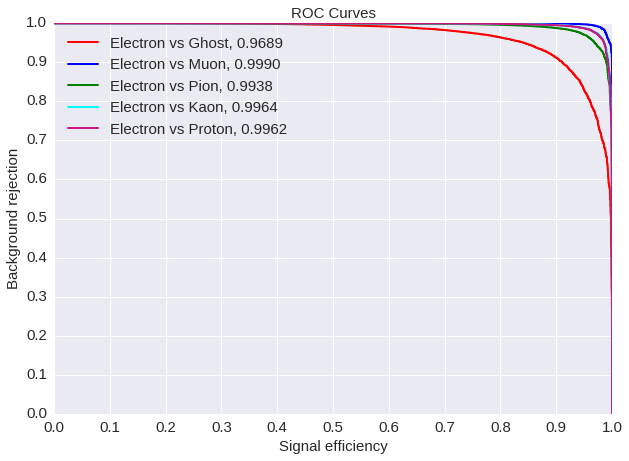

In [40]:
utils.get_one_vs_one_roc_curves(y_test, preds, label_list)

In [41]:
fl = utils.get_flatness_table(test, y_test, preds, label_list)

In [42]:
fl

,TrackP,TrackPt,P_Conf_level,Pt_Conf_level
Ghost,0.002712,0.007034,0.000861,0.000872
Muon,0.028603,0.045837,0.000905,0.000892
Pion,0.018296,0.014760,0.000849,0.000850
Kaon,0.047779,0.035304,0.000877,0.000870
Proton,0.040873,0.044285,0.000887,0.000890
Electron,0.008235,0.030054,0.001050,0.000997


In [43]:
flatness_baseline = pd.read_csv("./PID/python/flatness_baseline.csv", index_col=0)
utils.get_flatness_ratio(fl, flatness_baseline)

,TrackP,TrackPt
Ghost,0.411417,0.495798
Muon,1.402932,1.018801
Pion,1.108057,1.075093
Kaon,1.109247,0.963075
Proton,1.180207,0.993576
Electron,1.257988,1.812782


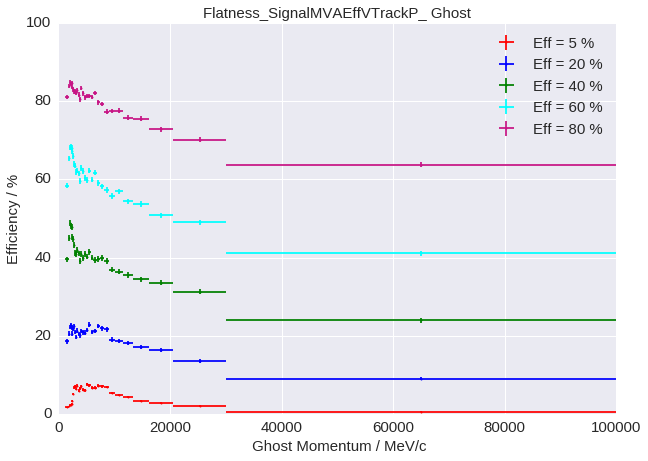

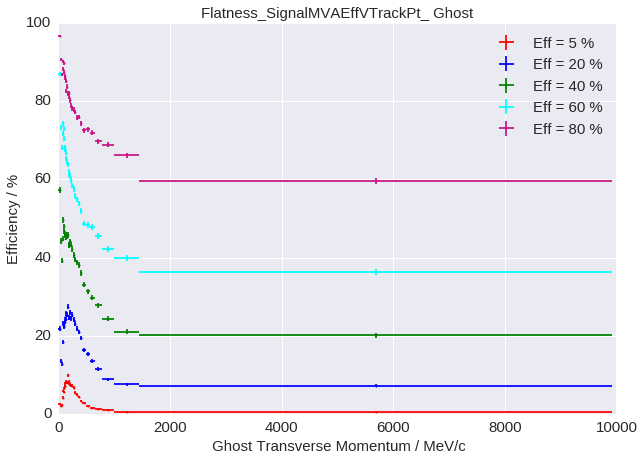

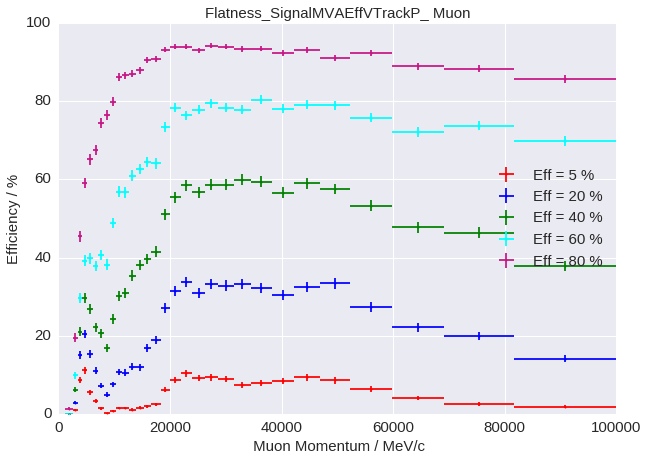

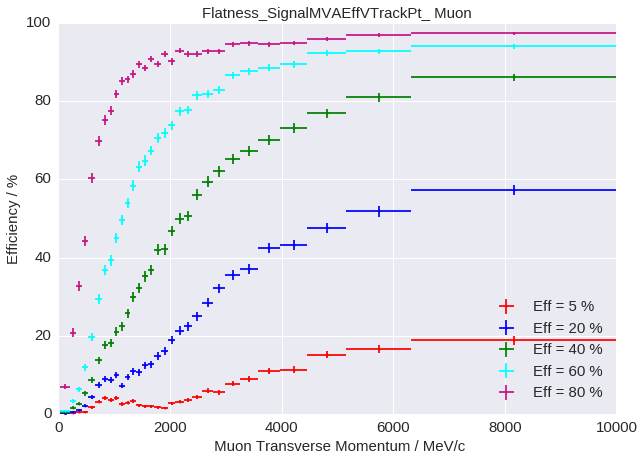

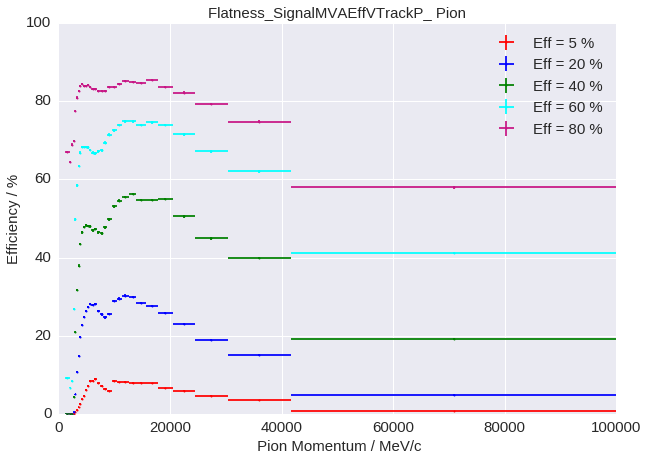

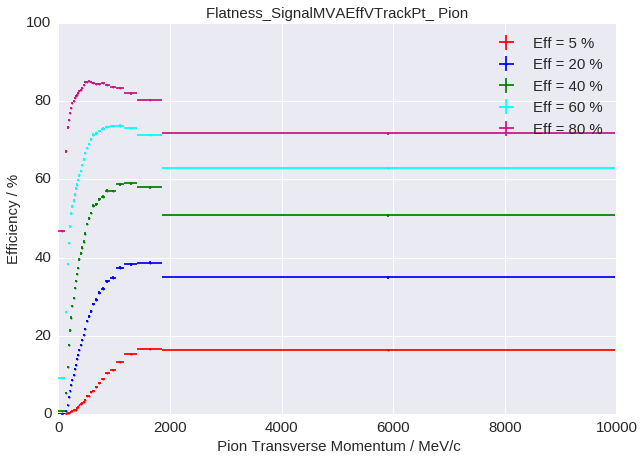

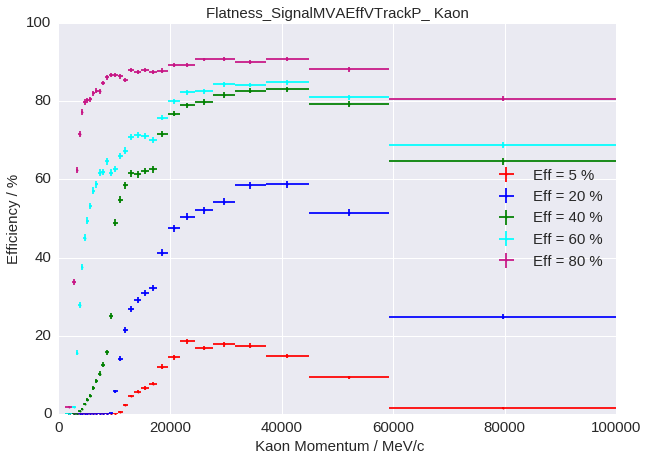

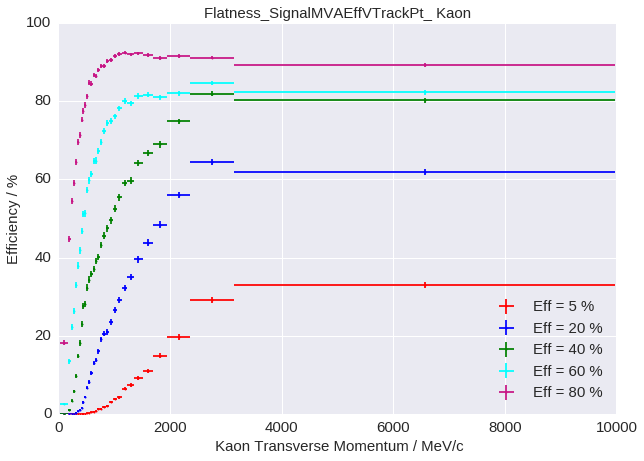

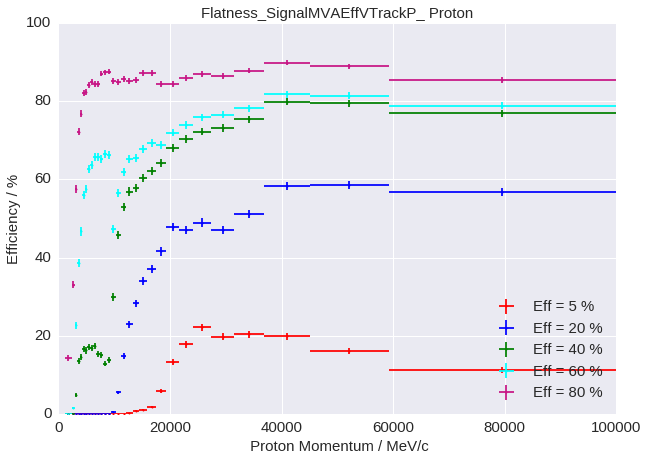

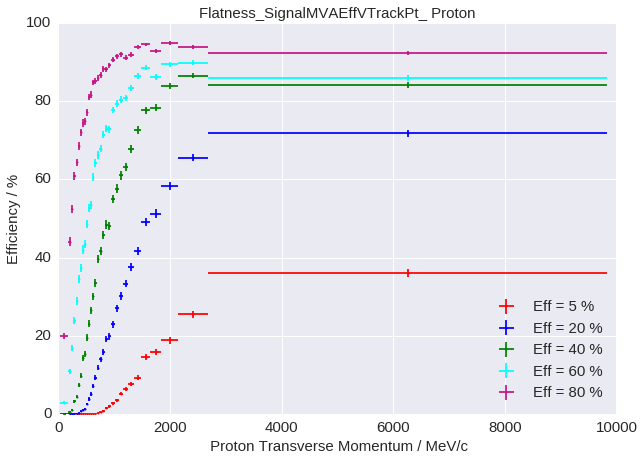

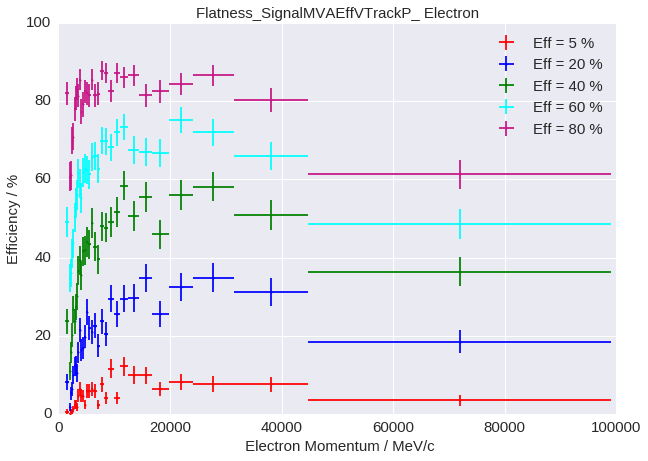

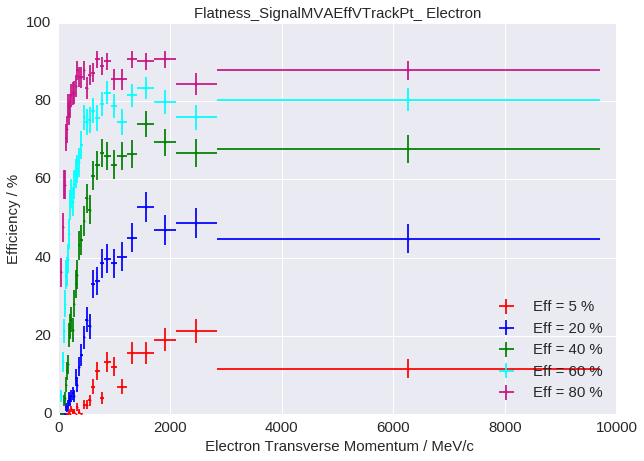

In [44]:
utils.get_all_flatness_figures(test, preds, y_test, '', label_list, show=True)

In [45]:
from itertools import combinations
from sklearn.metrics import log_loss

auc_sum = 0.0

for ind1, ind2 in combinations(range(6), 2):
    auc_sum += mat.iloc[ind1, ind2]
print('Avg. pairwise ROC AUC:', auc_sum / 15)

print('Logloss:', log_loss(target_m, preds))

print('Mean flatness:', fl[['TrackP', 'TrackPt']].values.mean())

Avg. pairwise ROC AUC: 0.970094404806
Logloss: 0.68630558267
Mean flatness: 0.0269809359547
